In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/heart - heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.shape

(303, 14)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


Lets do some EDA first

In [ ]:
df.isnull().sum()  # as we can see and understand that the data is already preprocessed and no null values present

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.info() # understanding the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


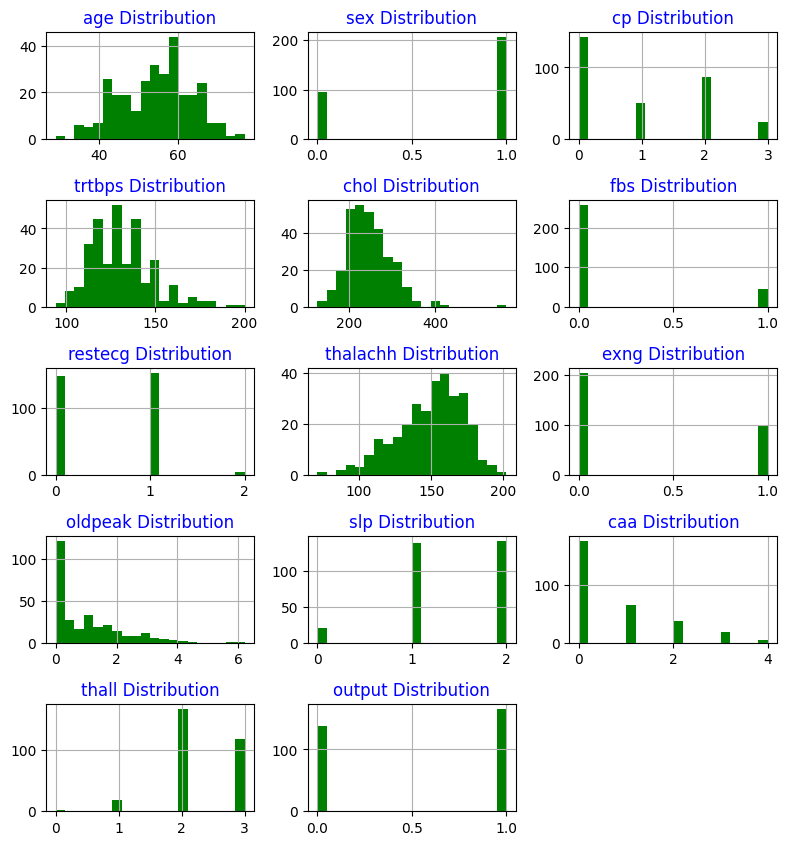

In [ ]:
# see some distribution by ploting histogram
def hist(dataframe,features,rows,cols):
  fig = plt.figure(figsize=(8,10))
  for i,feature in enumerate(features):
    ax = fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins =20,ax =ax,facecolor='green')
    ax.set_title(feature+" Distribution",color ='blue')
  fig.tight_layout()
  plt.show()

hist(df,df.columns,6,3) # calling the function

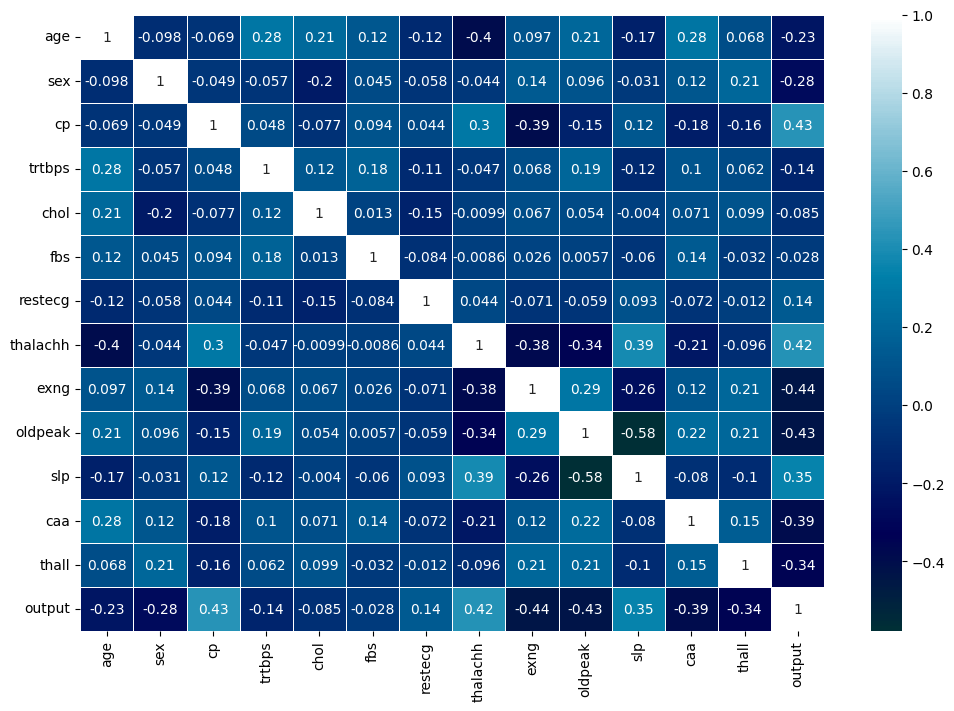

In [ ]:
# lets try to see some corellations
plt.figure(figsize =(12,8))
sns.heatmap(df.corr(),annot =True,linewidth =0.5,center =0,cmap = 'ocean')
plt.show()

Now try to build our algorithm..

In [ ]:
# splitting the data into train and test

x_train,x_test,y_train,y_test = train_test_split(df.drop(columns = 'output'),df['output'],test_size = 0.2,random_state =42)

In [ ]:
# applying logostic regression on the training data
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# lets see the accuracy of the logistic regression on the testing data
print(logistic_reg.score(x_test,y_test))

0.8852459016393442


In [ ]:
# building the KNN model
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# score
print(knn.score(x_test,y_test))

0.6885245901639344


In [ ]:
# decision tree
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(tree.score(x_test,y_test))

0.8360655737704918


In [ ]:
# compairing accuracy score
print('Logistic Regression accuracy score: ',logistic_reg.score(x_test,y_test))
print('KNN accuracy: ',knn.score(x_test,y_test))
print('Decision tree accuracy: ',tree.score(x_test,y_test))

Logistic Regression accuracy score:  0.8852459016393442
KNN accuracy:  0.6885245901639344
Decision tree accuracy:  0.8360655737704918


**Logistic regression is a better choice for this problem because of its simplicity and interpretable & fast to train & predict**

*ways to improve the performance*
* Increase the number of sample of training samples
* using diff set of features
* Regularizing the model


*   The most important features in the decision tree are "age,sex,cp,trestbps,chol"
*   Logistic Regression is better where target variable is categorical & feature numbers are large

* Decision tree is beter where target variable is categorical & relationship between feature and target variable are not linear

*   I would prefer logistic regression over KNN and decision tree where target variable is categorical & number of feature is small
*   use KNN over logistic regression & decision tree where target variable is contineous & number of feature is large, bcz KNN can handle more complex relationship between feature & target variable.



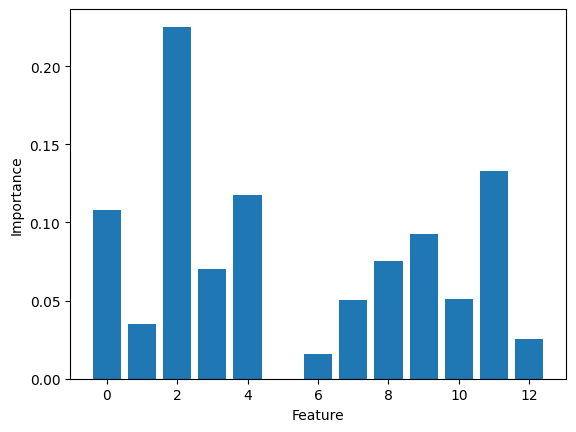

In [ ]:
plt.bar(range(len(tree.feature_importances_)),tree.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()